# SOLUTION NOTEBOOK

---

# Visualize MNIST with PCA

## Exercise - Load data

> **Exercise**: Load the ten thousand images and their labels from `mnist-10k.npz`.

In [2]:
import numpy as np
import os
import tensorflow as tf

# Load data
with np.load(os.path.join('data', 'mnist-10k.npz')) as npz_file:
    X = npz_file['data']
    y = npz_file['labels']
    
print('X:', X.shape, X.dtype)
print('y:', y.shape, y.dtype)

ImportError: Traceback (most recent call last):
  File "c:\users\waldo\source\repos\study_1\courses\courses\env\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "c:\users\waldo\source\repos\study_1\courses\courses\env\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "c:\users\waldo\source\repos\study_1\courses\courses\env\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: Une routine d’initialisation d’une bibliothèque de liens dynamiques (DLL) a échoué.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

## Exercise - Visualize digits on a 2d plot

> **Exercise**: Compute the first two principal components using all the images and then plot a subset of the database using them, e.g., 500 images.

In [2]:
from sklearn.decomposition import PCA

# Compute first two principal components
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

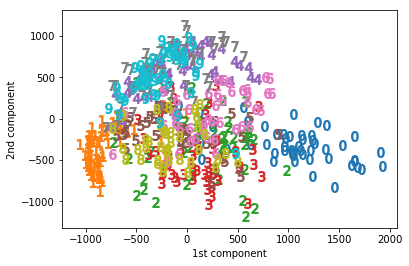

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# Compute component scores of 500 images
digits_components = pca.transform(X[:500])
digits_label = y[:500]

# Group images by digit
for label in range(10): # 0,1,2,3..9
    # Images of this digit
    idx = (digits_label == label)
    
    # Plot images
    plt.scatter(
        digits_components[idx, 0], digits_components[idx, 1],
        # Use digits as markers
        # Take a look at https://stackoverflow.com/a/17291915/3890306
        marker="${}$".format(label),
        s=100 # Size of each marker
    )
    
# Add legend and labels
plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()